* 이 커널은 [DieTanic](https://www.kaggle.com/ash316/eda-to-prediction-dietanic) 커널을 필사하며 정리한 것입니다.

# EDA To Prediction (DieTanic)

    "때로는 인생은 잔인한 해학적 감각을 지닌다. 늘 원했던 것을 가장 나쁜 때에 준다."
    - Lisa Klaypas

타이타닉 호의 침몰은 역사상 가장 유명한 해상사고 중 하나입니다. 1912년 4월 15일, 타이타닉 호는 첫 항해 중 빙산과 충돌하여 침몰했고 2224명의 승객 중 1502명이 사망했습니다. 이 커널의 제목이 **DieTanic**인 이유가 그것입니다. 이는 매우 불행한 재해이며 그 누구도 잊을 수 없을 것입니다.<br><br>
타이타닉 호는 건조하는 데 약 7500만 달러가 들었으며 충돌로 인해 바다속에 가라앉았습니다. 타이타닉 호의 데이터셋은 데이터사이언스 탐험을 시작하고 캐글 컴페티션에 참여하는 초보자들에게 아주 유용한 데이터셋입니다.<br><br>
이 notebook의 목적은 **예측 모델링 문제를 해결하는 workflow에 대한 아이디어**를 제공하는 데에 있습니다. 어떻게 feature들을 확인하고 어떻게 새로운 feature를 추가하는지, 그리고 몇몇 머신 러닝 개념에 대해서. 이 notebook은 newbie들도 쉽게 이해할 수 있도록 가능한 한 기본적인 내용으로 구성되었습니다.<br><br><br>

## Content of the Notebook:
**Part1: Exploratory Data Analysis(EDA):**<br>
1) Analysis of the features

2) Finding any relations or trends considering multiple features
<br><br>

**Part2: Feature Engineering and Data Cleaning:**<br>
1) Adding any few features

2) Removing redundant features

3) Converting features into suitable form for modeling
<br><br>

**Part3: Predictive Modeling**<br>
1) Running Basic Algorithms

2) Cross Validation

3) Ensembling

4) Important Features Extraction

<br><br>

# Part1: Exploratory Data Analysis(EDA)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum() # null values들을 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked**에 null value가 있습니다. 나중에 fix할 것입니다.
<br><br>

###How many Survived??

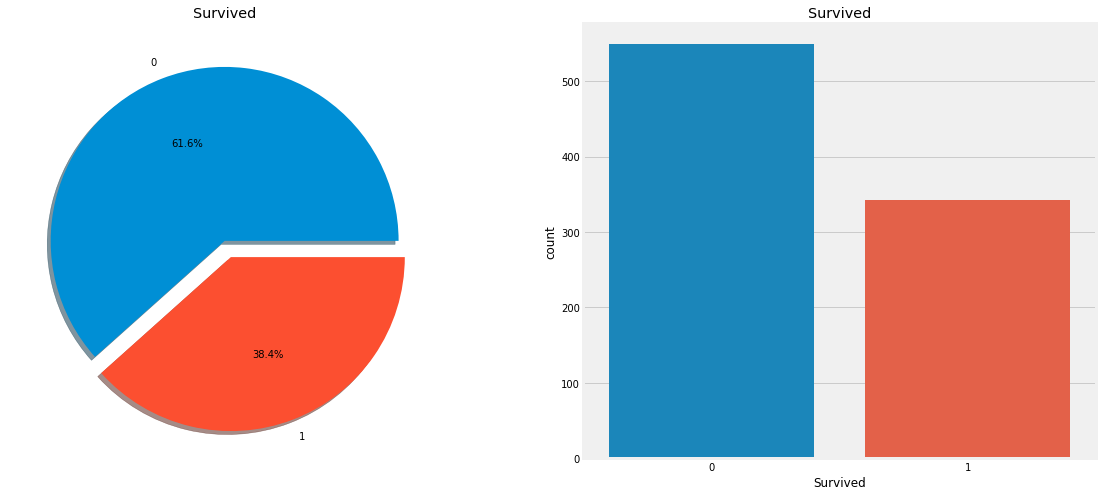

In [5]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')

plt.show()

많은 수의 승객이 생존하지 못했다는 것을 알 수 있습니다.

train set의 891명의 승객 중 350명(**38.4%**)만이 생존했습니다. 우리는 데이터로부터 더 좋은 insight를 얻기 위해 좀 더 자세히 살펴보고, 어떤 category의 승객이 생존했는지(혹은 생존하지 못했는지)에 대해 알아봐야 합니다.

이제부터 dataset의 서로 다른 feature들을 이용해서 생존률을 확인할 것입니다. Sex, Embarked, Age 등등...

우선 feature의 type에 대해 이해하고 넘어가겠습니다.

<br><br>

## Types Of Features

#### Categorical Features:
범주형 변수는 둘 이상의 범주로 구분되고 각각의 값들은 어느 범주에 속합니다. 예를 들어, 성별은 남성과 여성의 범주로 구분되는 범주형 변수입니다. 각각의 값은 순서나 상하관계를 지니지 않습니다. 명목 변수(Norminal Variable)라고도 합니다.

**범주형 변수 : Sex, Embarked**

<br>

#### Ordinal Features:
서수형 변수는 범주형 변수와 비슷하지만, 값들 간에 순서가 존재한다는 차이가 있습니다. 예를 들어 **키**라는 변수에 **큼, 중간, 작음**이라는 값이 있다면, 키는 서수형 변수입니다.

**서수형 변수 : PClass**

<br>

#### Continuous Feature:
연속형 변수는 값들이 최소값과 최대값 사이에서 연속적으로 존재하는 변수를 말합니다.

**연속형 변수 : Age**


<br><br>

## Analysing The Feature
### Sex (Categorical Feature)

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

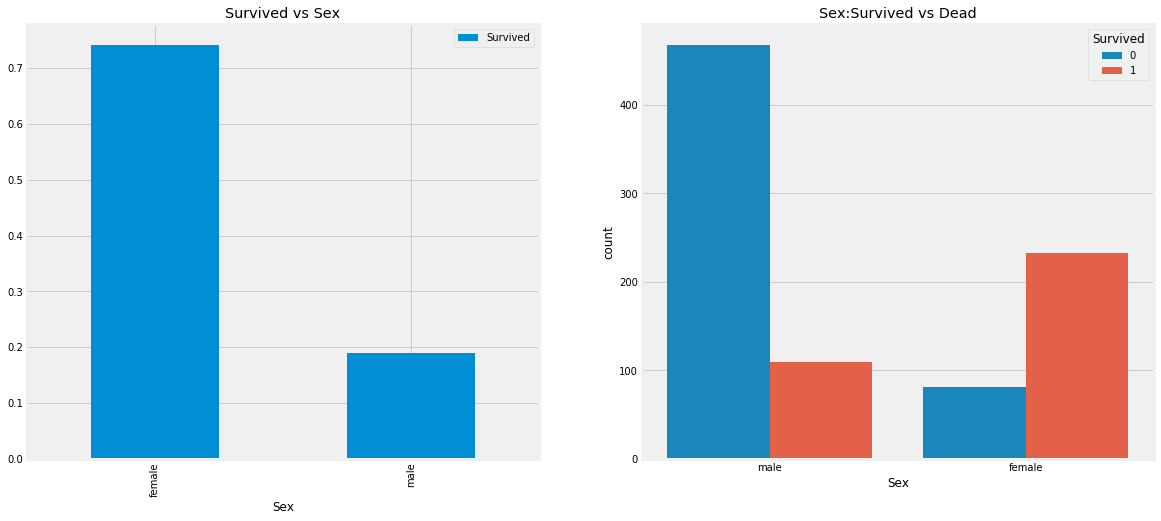

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

흥미롭습니다. 남성 승객의 수는 여성 승객의 두 배가 넘습니다. 그러나 구조된 여성의 수는 구조된 남성의 두 배 가까이 됩니다. **여성의 생존율은 거의 75%인 반면 남성의 생존율은 18~19% 가량입니다.**

Sex가 매우 중요한 feature임을 보여줍니다. 다른 feature도 살펴봅시다.

<br><br>

### Pclass (Ordinal Feature)

In [8]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


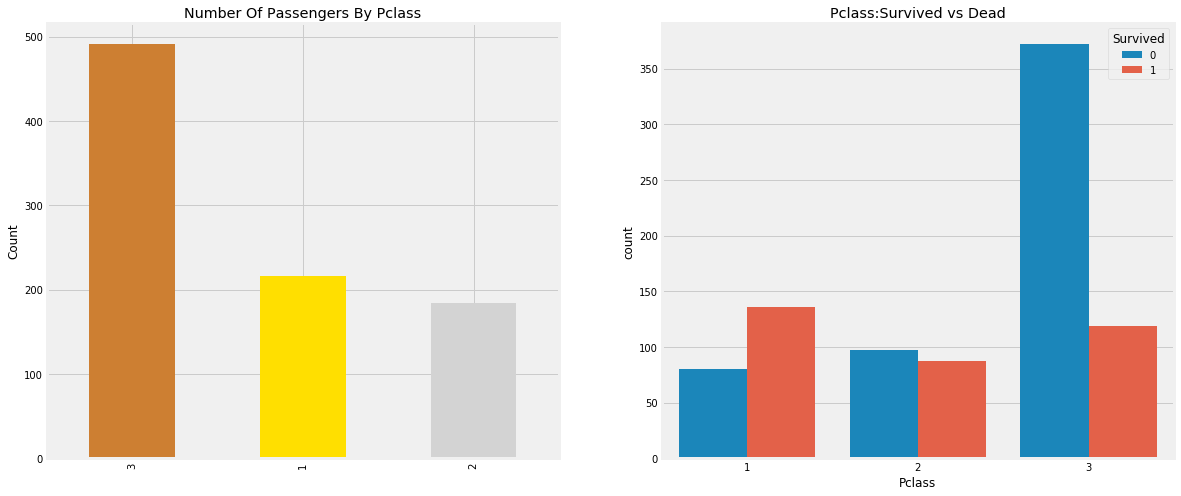

In [9]:
f,ax = plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(color = ['#cd7f32','#ffdf00','#d3d3d3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

사람들은 **돈이 전부가 아니다**라고 말합니다. 하지만 우리는 명백하게 Pclass 1의 승객의 구조율이 높음을 확인할 수 있습니다. 심지어 Pclass 3의 승객 수는 매우 높지만, 생존자는 매우 적습니다(약 **25%**).

Pclass 1의 생존율은 약 **63%**이고 Pclass 2의 생존율은 약 **48%**입니다. 돈과 지위가 중요합니다. 이 무슨 물질만능주의.

좀 더 자세히 살펴보고 다른 흥미로운 점이 없는지 확인해봅시다. 한번 **Sex와 Pclass**에 대한 생존율을 확인해보겠습니다.

In [10]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

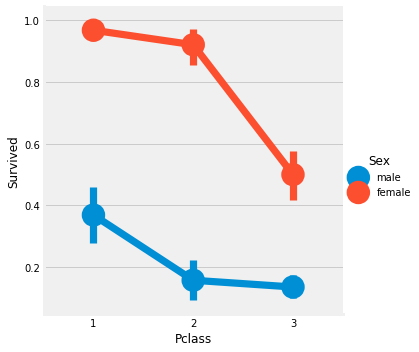

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

이때 **FactorPlot**을 사용하는데, 범주형 값들을 쉽게 분리해서 볼 수 있기 때문입니다.

**CrossTab**과 **FactorPlot**을 보면, **Pclass 1의 여성**의 생존률이 **95~96%** 정도임을 알 수 있습니다. 94명의 Pclass 1 여성 승객 중 단 3명이 사망했습니다.

또한 Pclass와 무관하게 구조하는 과정에서 여성에게 우선순위가 있었음은 확실합니다. 남성은 Pclass 1이라도 생존율이 매우 낮습니다.

Pclass 또한 매우 중요한 feature로 보입니다. 다른 feature를 살펴봅시다.

<br><br>

### Age (Continuous Feature)

In [12]:
print("가장 높은 나이 : ", data['Age'].max())
print("가장 낮은 나이 : ", data['Age'].min())
print("평균 나이 : ", data['Age'].mean())

가장 높은 나이 :  80.0
가장 낮은 나이 :  0.42
평균 나이 :  29.69911764705882


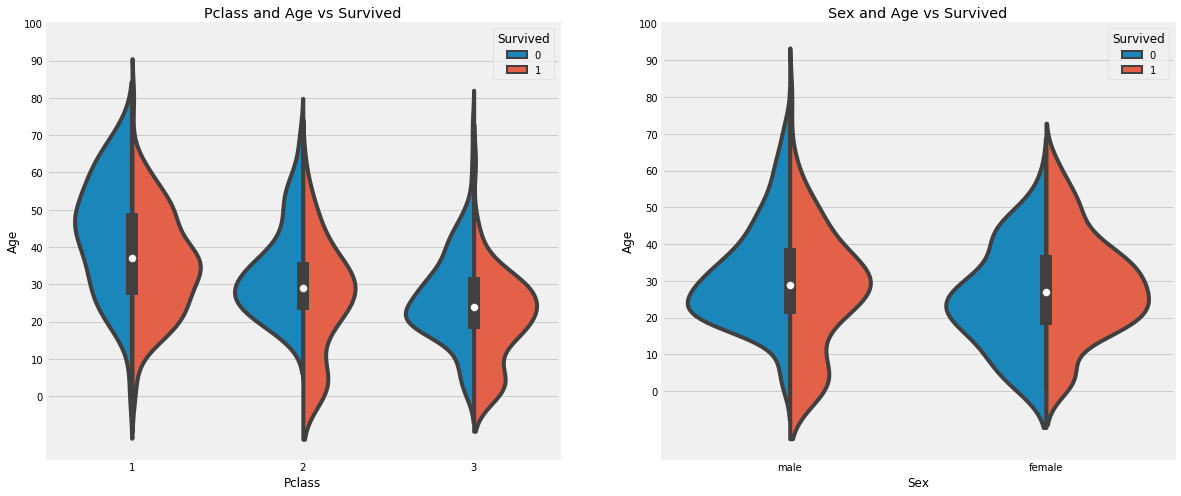

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

1) Pclass가 3으로 갈수록 아이가 많아지고 10세 미만의 승객의 생존율은 Pclass에 관계없이 양호해 보입니다.

2) Pclass 1에서 나이가 20~50세일 때 생존할 가능성이 높고, 특히 여성이 더욱 그렇습니다.

3) 남성의 경우, 나이가 높아질수록 생존율은 떨어집니다.

<br><br>

앞서 살펴봤듯이, Age는 177개의 null data를 갖고 있습니다. 이 NaN value를 대체하기 위해 데이터셋의 평균을 사용할 수 있습니다.

하지만 문제는 사람은 다양하고 나이도 제각각이라는 점입니다. 우리는 4살 아이에게 29살이라는 평균값을 지정해줄 수 없습니다. 승객이 어떤 연령대에 있는지 알 수 있는 방법이 없을까요?

답은 **"있다"** 입니다. 우리는 **Name**을 확인할 수 있습니다. 이 feature를 보면, Mr나 Mrs같은 접두사가 있음을 알 수 있습니다. 따라서 Mr나 Mrs의 평균값을 해당 그룹에 지정해줄 수 있습니다.

In [0]:
data['Initial'] = ''
for i in data:
    data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

여기서 "[A-Za-z]+\."라는 정규식을 사용했습니다. 이는 A-Z 또는 a-z에 해당하는 문자열이 나열되어 .으로 끝난다는 뜻입니다. 그러므로 우리는 성공적으로 Name으로부터 접두사를 추출했습니다.

In [15]:
# Initial을 Sex와 함께 비교
pd.crosstab(data['Initial'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


자, 여기서 Mlle이나 Mme 등 오타가 난 접두사가 보입니다. 이들을 Miss로 대체하고 다른 값들도 똑같이 수정해보겠습니다.

In [16]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

# Initial에 따른 평균 나이를 확인
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [17]:
# NaN 값들을 반올림한 Initial별 평균 나이로 대체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

# null 값들이 완전히 채워졌는지 확인
data['Age'].isnull().any()

False

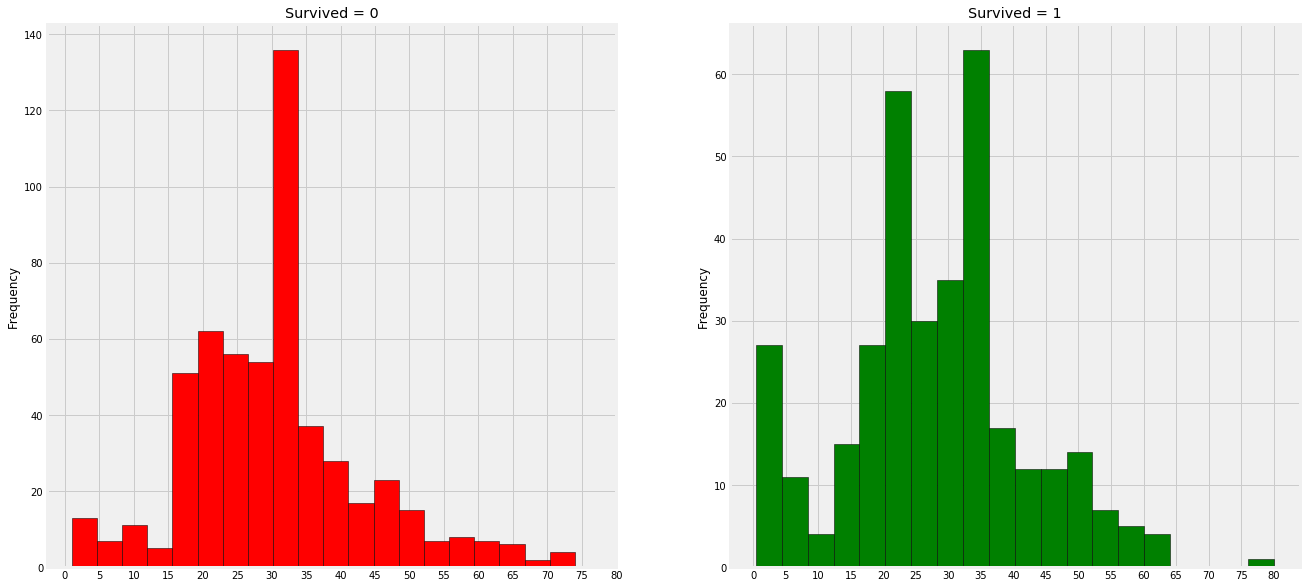

In [18]:
f,ax = plt.subplots(1,2, figsize=(20,10))

data[data['Survived']==0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title("Survived = 0")
x = list(range(0,85,5))
ax[0].set_xticks(x)

data[data['Survived']==1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title("Survived = 1")
ax[1].set_xticks(x)

plt.show()

1) 아기들(Age<5)은 대부분 구조되었습니다. (여성과 아이를 우선함)

2) 가장 나이가 많은 승객(80세)도 구조되었습니다.

3) 가장 많이 사망한 연령대는 30~40세 사이입니다.

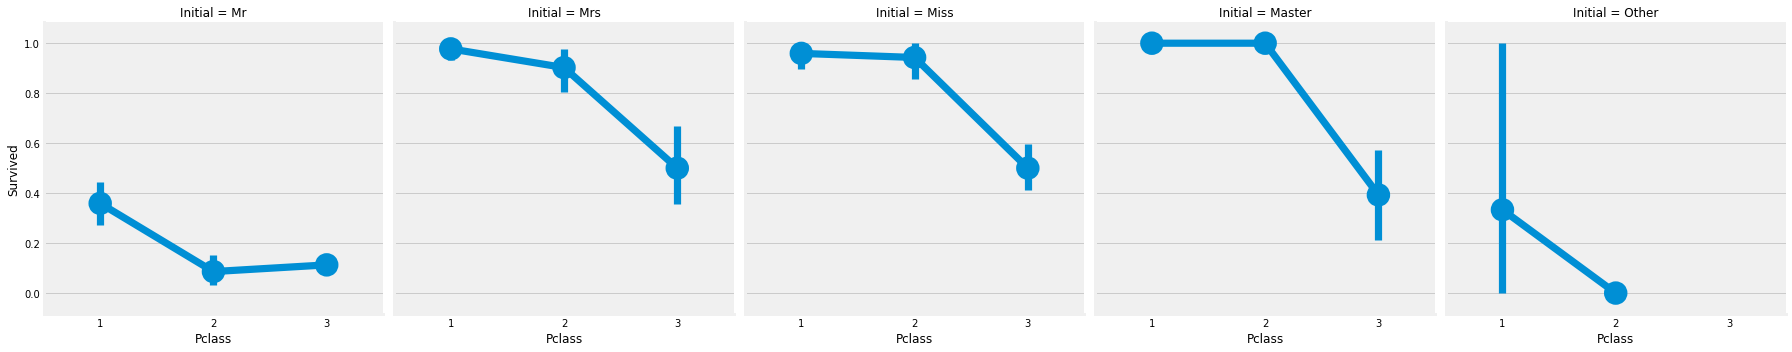

In [19]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

Pclass에 상관없이 여성과 아이를 우선시하는 경향을 확인할 수 있습니다.

<br><br>

### Embarked (Categorical Value)

In [20]:
pd.crosstab([data['Embarked'],data['Pclass']],
            [data['Sex'],data['Survived']],margins=True).style.background_gradient(cmap='summer_r')

<br><br>

#### Chances for Survival by Embarked

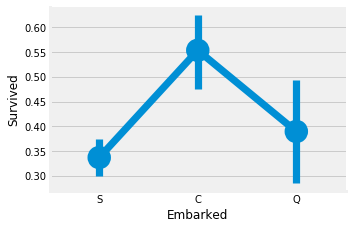

In [21]:
sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

C에서 승선했을 경우 생존율이 약 55%로 가장 높고, S가 가장 낮습니다.

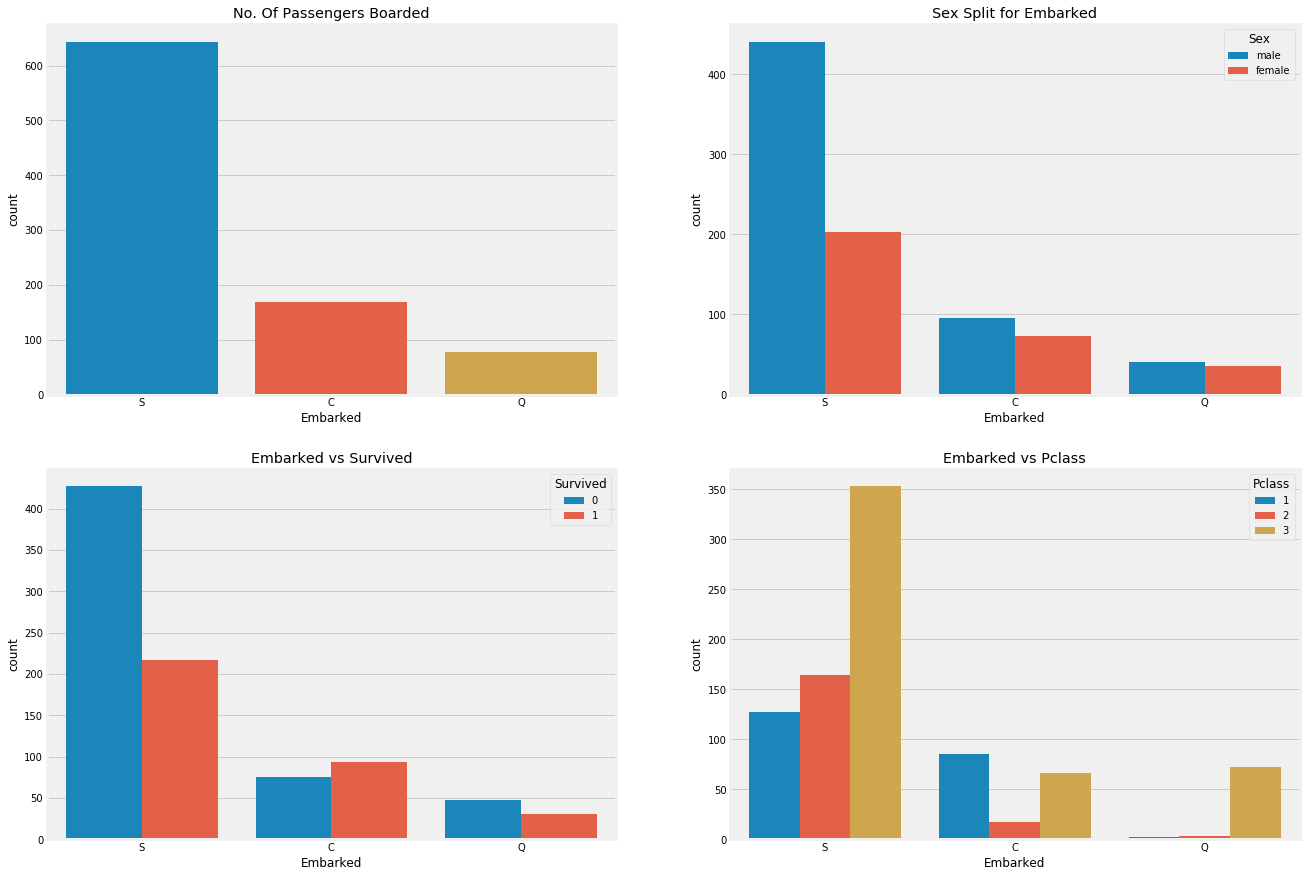

In [22]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Sex Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.show()

1) 가장 많은 승객이 승선한 항구는 S입니다. 그들 중 대부분은 Pclass 3입니다.

2) C의 승객들은 많은 비율이 생존했기 때문에 운이 좋습니다. 아마 Pclass 1 혹은 2인 승객이 많이 구조되었기에 이렇게 나타났을 수도 있습니다.

3) S는 부자들이 주로 승선한 항구로 보입니다. 하지만 생존율은 낮은데, 약 81%의 Pclass 3인 승객들이 생존하지 못했기 때문입니다.

4) Q에서 승선한 승객의 거의 95%가 Pclass 3입니다.

<br>

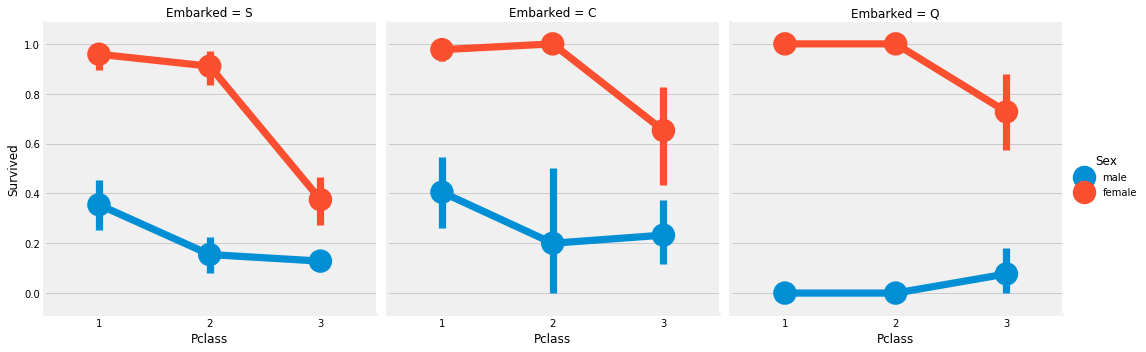

In [23]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

1) Pclass 1과 2의 여성은 생존율이 100%에 가깝습니다.

2) S를 볼 때, Pclass 3의 승객들은 남녀 모두 생존율이 매우 낮은 것으로 보아 아주 불행합니다. **(돈이 최고다)**

3) Q를 볼 때, 남성들은 아주 불생합니다. 대부분이 Pclass 3이기 때문인 것으로 보입니다.

<br><br>

#### Filling Embarked NaN
Embarked에서 최빈값은 S였으므로 S로 채우겠습니다. (결측값이 작으므로 최빈값으로 채움)

In [24]:
data['Embarked'].fillna('S', inplace=True)

data['Embarked'].isnull().any()

False

### SibSp (Discrete Feature)

이 변수는 가족구성을 나타내는 이산형 변수입니다. Sibling(형제자매) + Spouse(배우자).

In [25]:
pd.crosstab([data['SibSp']], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


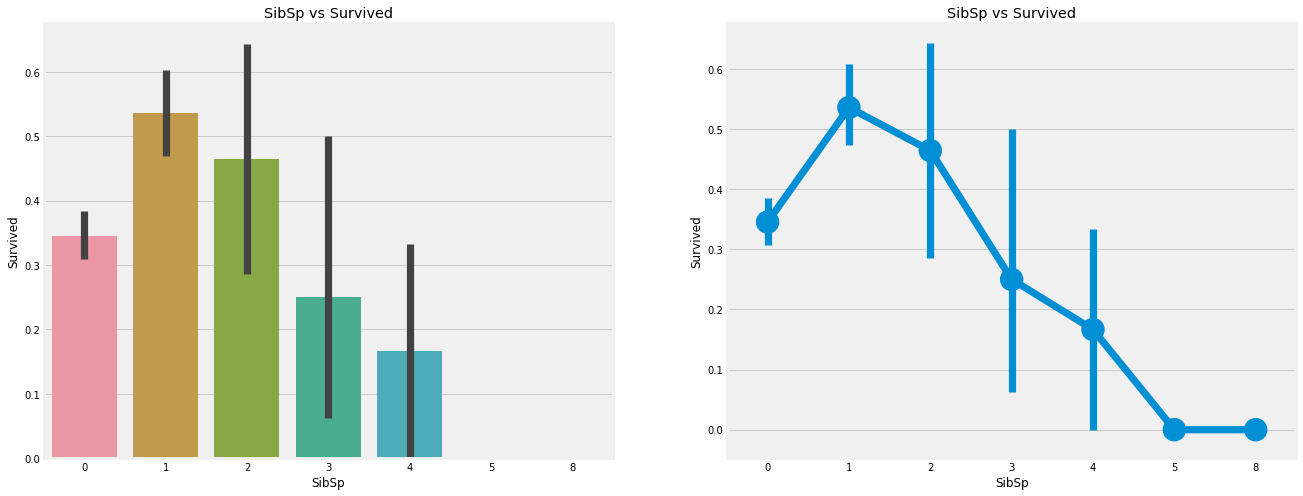

In [26]:
f,ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

In [27]:
pd.crosstab(data['SibSp'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


barplot과 factorplot을 볼 때 만약 승객이 혼자 승선했다면 생존율은 34.5%입니다. SibSp의 숫자가 늘어나면 그래프는 가파르게 감소합니다. 말이 됩니다. 그것은 즉, 만약 가족이 배에 있다면 가족을 구하려 할 것입니다. 놀랍게도 SibSp가 5~8명인 가족의 생존율은 0%입니다.

이유는 바로 **Pclass**입니다. crosstab에서 볼 수 있듯 SibSp>3인 가족들은 전부 Pclass 3입니다. 이는 즉 Pclass 3의 규모가 큰(>3) 가족들은 전부 죽었다는 뜻입니다.

<br><br>

### Parch

In [28]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


crosstab은 역시 규모가 큰 가족은 Pclass가 3임을 보여줍니다.

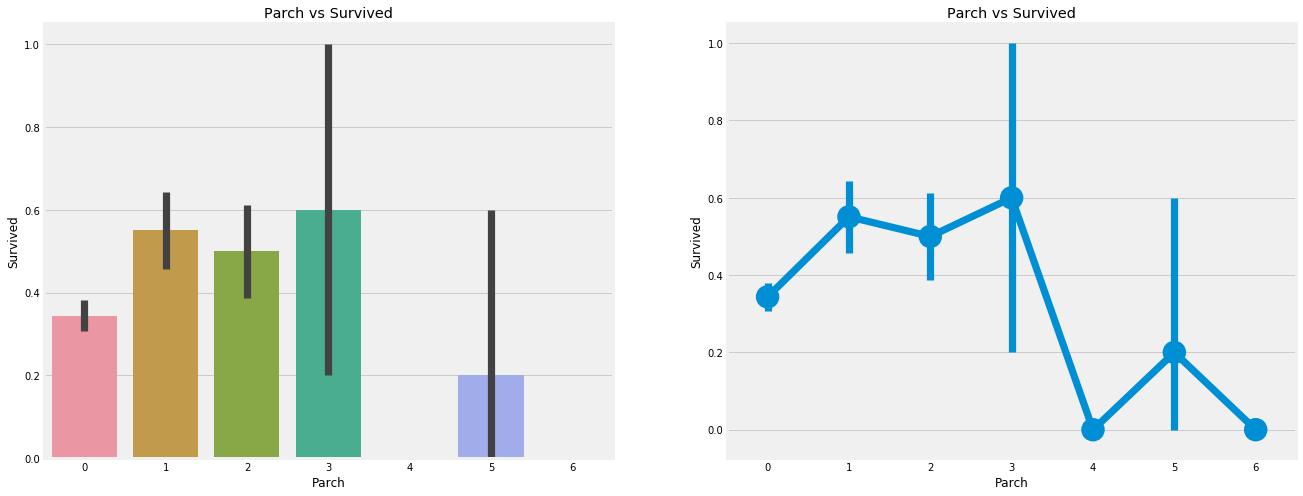

In [29]:
f,ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

앞의 것과 비슷한 결과가 나옵니다. 부모 혹은 자식과 함께 승선한 승객들은 혼자인 승객보다 생존율이 높습니다. 하지만 수가 커지면 생존율이 줄어듭니다.

Parch가 1~3일 때 생존율은 가장 높습니다. 또한 혼자 승선하는 것은 매우 치명적인 것이라고 보이고, Parch가 >4일 경우 생존율이 줄어듭니다.

<br><br>

### Fare (Continuous Feature)

In [30]:
print('가장 비싼 요금 :', data['Fare'].max())
print('가장 싼 요금 :', data['Fare'].min())
print('평균 요금 :', data['Fare'].mean())

가장 비싼 요금 : 512.3292
가장 싼 요금 : 0.0
평균 요금 : 32.2042079685746


가장 싼 요금은 **0.0**입니다!! 공짜 승선 개꿀띠~

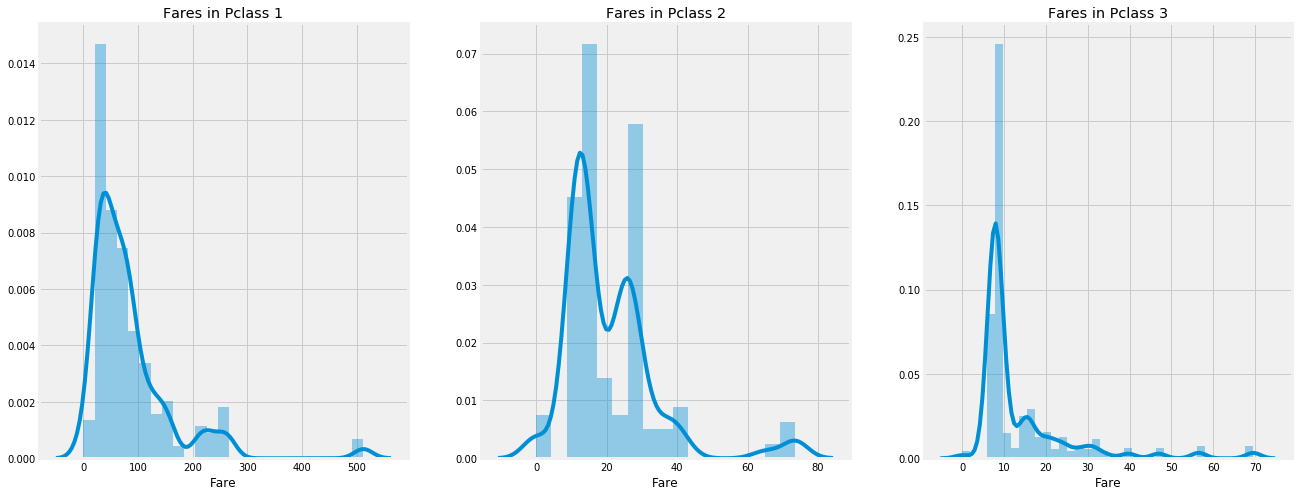

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

Pclass 1의 승객 요금은 큰 분포를 가지며, 이 분포는 standards reduces에 따라 감소합니다. 또한 이 데이터는 연속형이므로 binning을 통해 이산형으로 바꿀 수 있습니다.

<br><br>

### 모든 feature에 대한 요약:
**Sex:** 남성에 비해 여성의 생존율이 높다.

**Pclass:** **Pclass 1의 승객**들이 높은 생존율을 갖는 경향을 보인다. **Pclass 3의 승객**의 생존율은 매우 낮다. 여성의 경우, **Pclass 1**의 승객은 생존율이 거의 100%에 가까우며 **Pclass 2**의 승객도 매우 높다. **돈의 최고다!!!**

**Age:** 5\~10세 이하의 어린이들은 생존율이 높다. 15\~35세의 승객들이 많이 죽었다.

**Embarked:** 매우 흥미로운 feature다. **C의 생존율은 Pclass 1 승객이 많이 승선한 S보다 높다.** Q에서 승선한 승객은 **전부 Pclass 3**이다.

**SibSp+Parch:** SibSp가 1\~2, 혹은 Parch가 1\~3인 승객이 혼자거나 그보다 가족 수가 많은 승객보다 생존 가능성이 높다.


<br><br>

## Correlation Between The Features

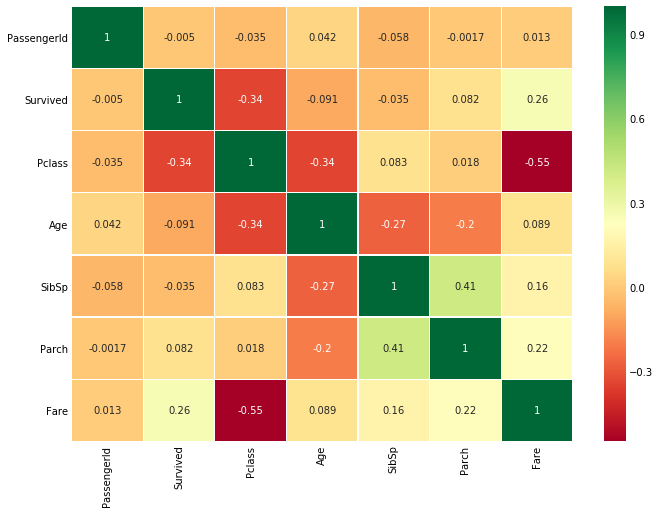

In [32]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidth=.2) # data.corr() -> 상관관계 매트릭스
fig = plt.gcf() # get current figure
fig.set_size_inches(10,8)
plt.show()

#### 히트맵 해석
가장 먼저 알아두어야 할 점은 알파벳이나 문자열은 상관관계를 구할 수 없기 때문에 수치형 feature만 비교 가능하다는 점입니다. plot을 이해하기 전에 상관관계가 뭔지 정확히 알아보고 가겠습니다.

**양의 상관관계**: **feature A가 증가함에 따라 feature B도 증가할 때, A와 B는 양의 상관관계에 있다**고 말합니다. 값이 1이라면 **완벽한 양의 상관관계**입니다.

**음의 상관관계**: **feature A가 증가함에 따라 feature B가 감소할 때, A와 B는 음의 상관관계에 있다**고 말합니다. 값이 -1이라면 **완벽한 음의 상관관계**입니다.

두 feature가 높은, 혹은 완벽한 상관관계를 갖고 있다고 하면 한 feature가 증가할 때 다른 feature도 증가함을 의미합니다. 이는 즉 두 feature가 매우 유사한 정보를 갖고 있으며 정보의 차이가 거의 혹은 전혀 없음을 의미합니다. 두 feature가 거의 같은 정보를 포함하고 있는 것을 가리켜 **다중공선성**이라고 합니다.

모델을 만들거나 훈련하는 과정에서, 우리는 중복된 feature를 제거해야 하는데 이는 시간 절약과 다양한 이점을 가져옵니다.

이제 위의 히트맵에서, 우리는 feature들이 그렇게 큰 상관관계를 가지지 않음을 알 수 있습니다. 가장 높은 상관관계는 **SibSp와 Parch의 0.41**입니다. 따라서 우리는 모든 feature를 사용할 수 있습니다.

<br><br>

## Part2: Feature Engineering and Data Cleaning

자, feature engineering이란 무엇일까요?

dataset이 제공될 때, 모든 feature가 중요한 것은 아닙니다. 제거해야 할 중복된 feature가 많을 수도 있습니다. 또한 다른 feature로부터 정보를 관찰하거나 추출하여 새로운 feature를 얻거나 추가할 수 있습니다.

한 예로 우리는 앞서 Name feature에서 Initial feature를 얻었습니다. 더 추가하거나 제거할 feature가 없는지 살펴봅시다. 또한 이미 존재하는 연관된 기능을 예측 모델링에 적합한 방식으로 변환할 것입니다.

<br>

### Age_band
**Age feature의 문제:**

앞서 언급했듯이 **Age는 연속형 변수**입니다. 현속형 변수를 머신러닝 모델에 사용하기에는 문제가 있습니다.

**예)** 성별을 기준으로 사람들을 구분할 경우 남성과 여성으로 쉽게 분류할 수 있습니다. 하지만 나이로 구분한다면 어떨까요? 30명의 사람이 있다면 30가지의 나이 value가 있을 수 있습니다. 이것이 문제가 됩니다.

따라서 binning이나 normalization을 통해 **연속형 변수를 범주형 변수로** 바꿔줘야 합니다. 여기서는 binning을 사용합니다. 즉, 연령 범위를 단일 bin으로 그룹화하거나 단일 값을 할당합니다.

Age의 최대값은 80입니다. 그러므로 0-80 범위를 5개의 bin으로 나누어 봅시다. 80/5 = 16이므로 각 bin의 사이즈는 16입니다.



In [33]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band']  = 0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


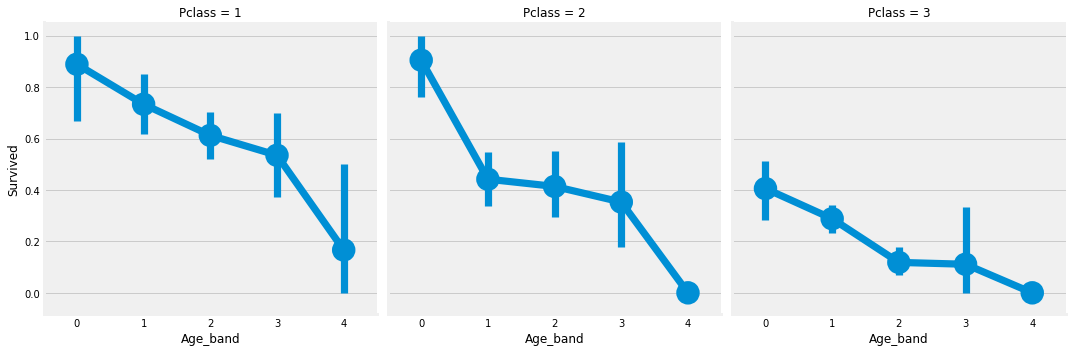

In [34]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

Pclass와 상관없이 나이가 증가함에 따라 생존율이 감소합니다.

<br>

### Family_Size and Alone
여기서는 **Family_Size**와 **Alone**이라는 feature를 새로 만들고 분석합니다. 이 feature는 SibSp와 Parch의 요약입니다. 결합된 데이터로우벝 우리는 승객의 가족 규모로부터 생존율이 어떤 영향을 받는지 확인할 수 있습니다. Alone은 승객이 혼자인지 아닌지를 나타냅니다.

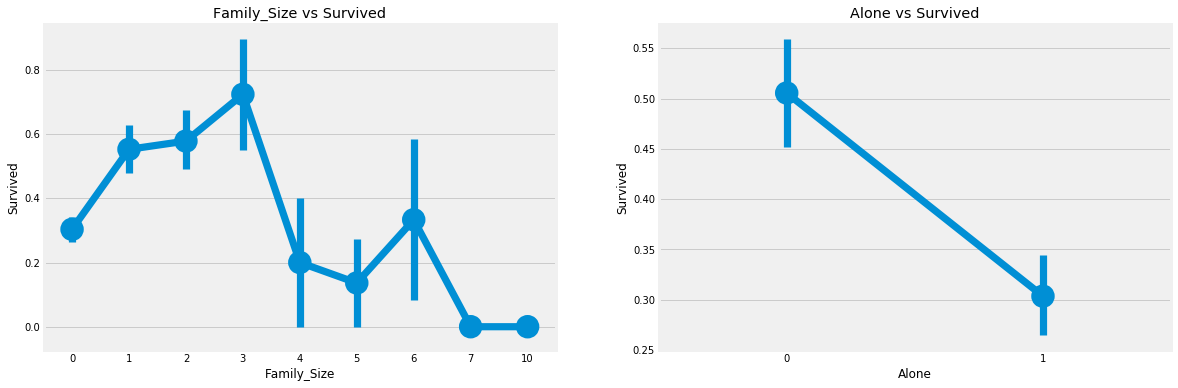

In [35]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data["SibSp"]
data['Alone'] = 0
data.loc[data['Family_Size']==0, 'Alone'] = 1

f,ax = plt.subplots(1,2,figsize=(18,6))

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0**은 그 승객이 혼자임을 의미합니다. 혼자거나 Family_Size가 0일 경우 명백하게 생존율이 매우 낮습니다. 또 Family_Size > 4일 경우, 생존율은 마찬가지로 감소합니다. 이것은 모델에 중요한 feature로 보입니다. 자세히 살펴봅시다.

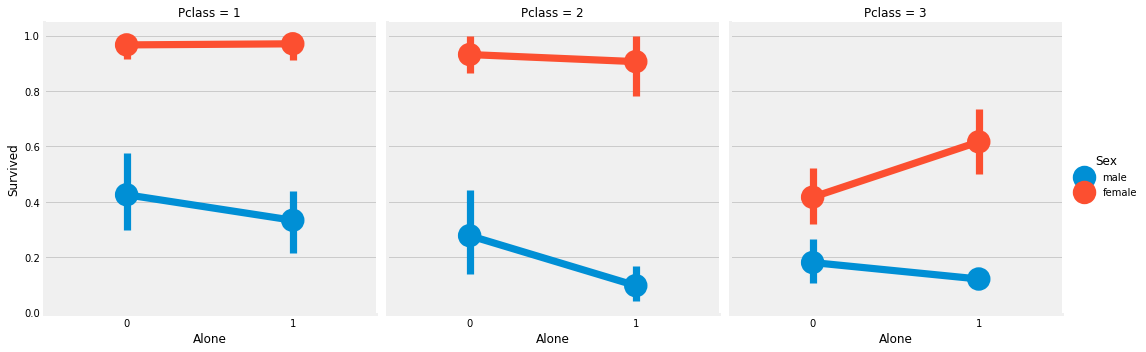

In [36]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

Sex나 Pclass에 상관없이 혼자인 경우 위험하다는 것이 보이지만, 예외로 Pclass 3의 여성은 혼자일 경우 생존율이 증가했습니다.

<br>

### Fare_Range

Fare 또한 연속형 변수이므로 서수형 변수로 바꿔줘야 합니다. 이를 위해 **pd.qcut**을 사용할 것입니다.

**qcut**은 우리가 입력한 bin 수에 따라 값을 쪼개거나 배열합니다. 따라서 5 bin을 전달하면 5개의 구간 또는 값 범위에 동일한 간격으로 값이 정렬됩니다.

In [37]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


**Fare_Range가 증가할수록 생존율도 증가한다**는 것을 알 수 있습니다.

지금 우리는 Fare_Range 값을 바로 전달할 수 없습니다. **Age_Band**처럼 단일 값으로 치환해야 합니다.

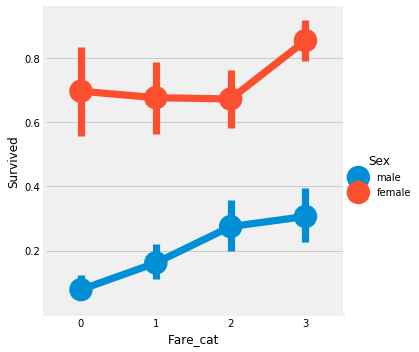

In [38]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

Fare_cat이 증가할수록 생존율이 명확하게 증가합니다. 이 feature는 모델링에 있어 Sex와 함께 중요한 feature가 될 것입니다.

<br>

### Converting String Value into Numeric
문자열은 머신러닝 모델에 전달할 수 없으므로 Sex, Embarked 등등의 feature들은 수치형 값으로 바꿔줘야 합니다.

In [0]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping Unneeded Features
**Name:** 어떠한 범주형 값으로도 변환할 수 없으므로 이 feature는 필요하지 않습니다.

**Age, Fare, Fare_Range:** Age_band와 Fare_cat을 얻었으므로 필요하지 않습니다.

**Ticket:** 무작위 문자열이므로 범주화할 수 없습니다.

**Cabin:** NaN값이 너무 많고 많은 승객들이 여러 cabin을 갖습니다. 따라서 이 feature는 쓸 수 없습니다.

**PassengerId:** 범주화할 수 없습니다.


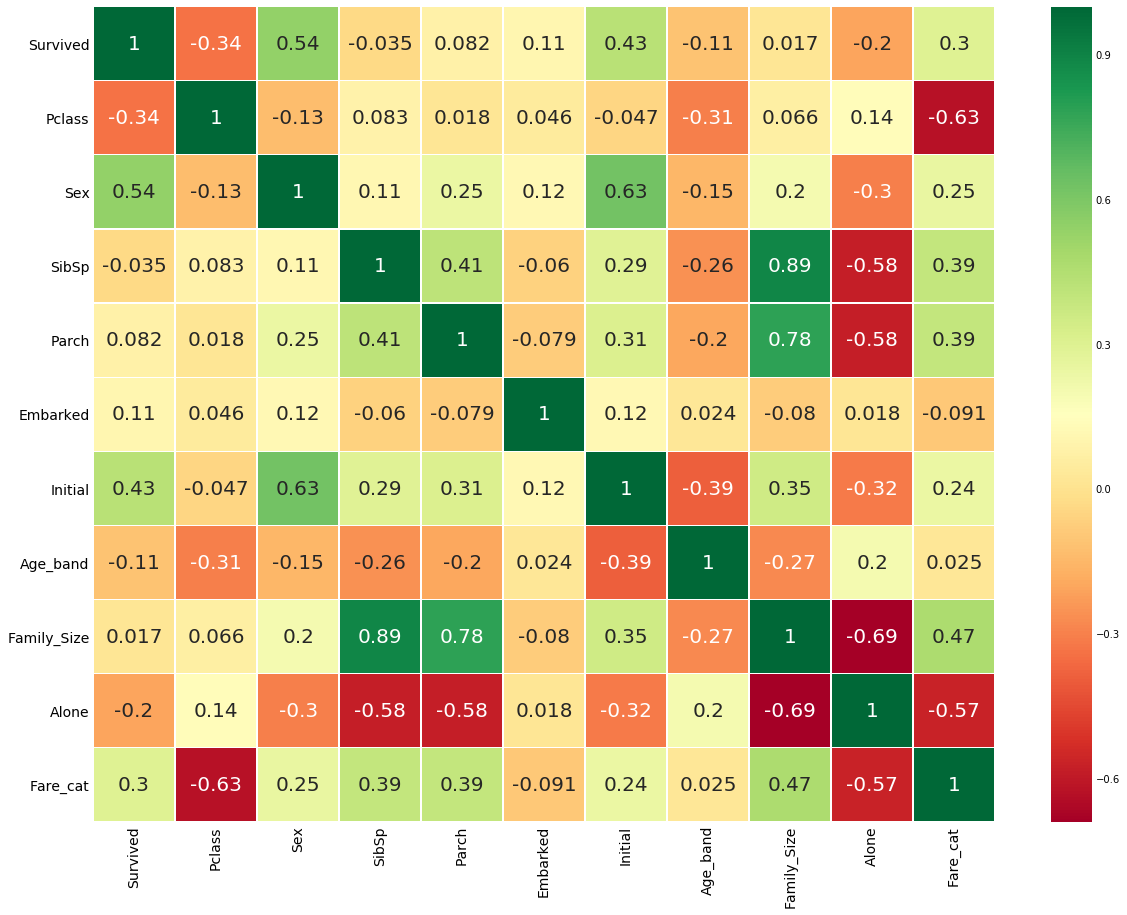

In [40]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

히트맵을 보면 상관관계가 강한 feature를 확인할 수 있습니다. **SibSp와 Family_Size, Parch와 Family_Size**는 강한 양의 상관관계에 있고, **Alone과 Family_Size**는 강한 음의 상관관계에 있습니다.


<br><br>

# Part3: Predictive Modeling

EDA 파트에서 우리는 몇몇 insight를 얻었습니다. 하지만 어떤 승객이 살았는지 죽었는지 정확하게 예측하거나 단언할 수는 없습니다. 그러므로 이제부터 몇몇 훌륭한 분류 알고리즘을 사용해 승객의 생존여부를 예측해볼 것입니다. 모델 세우기에 사용할 알고리즘은 다음과 같습니다.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [0]:
train,test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']
prediction = []

### Radial Support Vector Mashines (rbf-SVM)

In [43]:
model = svm.SVC(kernel='rbf', C=1, gamma=.1)
model.fit(train_X,train_Y)
prediction.append(model.predict(test_X))
print('rbf SVM의 accuracy:', metrics.accuracy_score(prediction[0],test_Y))

rbf SVM의 accuracy: 0.835820895522388


### Linear Support Vector Machine (linear-SVM)

In [44]:
model = svm.SVC(kernel='linear', C=.1, gamma=.1)
model.fit(train_X,train_Y)
prediction.append(model.predict(test_X))
print('linear SVM의 accuracy:', metrics.accuracy_score(prediction[1],test_Y))

linear SVM의 accuracy: 0.8171641791044776


### Logistic Regression

In [45]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction.append(model.predict(test_X))
print('Logistic Regression의 accuracy:', metrics.accuracy_score(prediction[2],test_Y))

Logistic Regression의 accuracy: 0.8134328358208955


### Decision Tree

In [46]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction.append(model.predict(test_X))
print('Decision Tree의 accuracy:', metrics.accuracy_score(prediction[3],test_Y))

Decision Tree의 accuracy: 0.8022388059701493


### K-Nearest Neighbours(KNN)

In [47]:
model = KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction.append(model.predict(test_X))
print('KNN의 accuracy:', metrics.accuracy_score(prediction[4],test_Y))

KNN의 accuracy: 0.832089552238806


KNN의 accuracy는 n_neighbours 값에 따라 바뀝니다. 기본값은 5입니다. 다양한 n_neighbours에 따른 accuracy를 확인해봅시다.

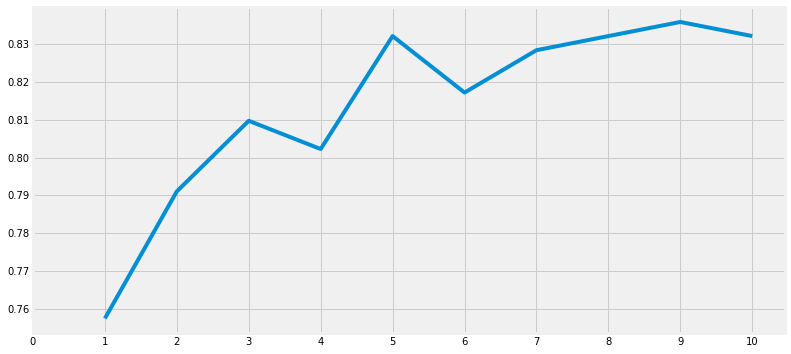

n값의 변화에 따른 accuracy: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] 
max accuracy: 0.835820895522388


In [48]:
a_index = list(range(1,11))
a = pd.Series()
x = list(range(11))

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    pred = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(pred, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('n값의 변화에 따른 accuracy:', a.values, '\nmax accuracy:',a.values.max())

###Gaussian Naive Bayes

In [49]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction.append(model.predict(test_X))
print('NaiveBayes의 accuracy:', metrics.accuracy_score(prediction[5], test_Y))

NaiveBayes의 accuracy: 0.8134328358208955


### Random Forest

In [50]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction.append(model.predict(test_X))
print('Random Forest의 accuracy:', metrics.accuracy_score(prediction[6], test_Y))

Random Forest의 accuracy: 0.8171641791044776


모델의 accuracy가 분류기의 robustness를 결정하는 유일한 요소는 아닙니다. 분류기가 train data로 학습되고 test data를 넣었을 때 accuracy가 90%라고 가정해봅시다.

분류기로서 accuracy가 매우 높아 보입니다. 하지만 다른 새로운 test set을 넣어도 똑같이 90%가 나올까요? 답은 **NO** 입니다. 왜냐하면 분류기가 어떤 인스턴스를 훈련시키는데 사용할지 결정할 수 없기 떄문입니다. train data와 test data가 바뀌면 accuracy도 바뀝니다. 증가하거나 감소하겠죠. 이것을 **모델 분산(model variance)**이라고 합니다.

이를 극복하고 모델을 일반화하기 위해 **교차검증(Cross Validation)**을 사용합니다.

<br>

## Cross Validation


많은 경우, 데이터는 불균형입니다. 즉, class1의 값은 많지만 다른 class의 값이 적을 수 있습니다. 따라서 dataset의 모든 instance에서 알고리즘을 학습하고 테스트해야 합니다. 그러면 dataset에 대해 기록된 모든 정확도의 평균을 취할 수 있습니다.

1) K-Fold 교차검증은 우선 dataset을 k개의 subset으로 나눕니다.

2) k=5라고 하면 dataset은 5개로 나뉩니다. 1개의 subset을 test data로, 나머지를 train data로 사용합니다.

3) test subset을 바꿔가며 알고리즘을 훈련함으로써 과정을 계속 진행합니다. 그런 다음 accruracy와 error를 평균하여 알고리즘의 평균 정확도를 얻습니다.

4) 알고리즘은 일부 train data에 대해 과대적합되거나 과소적합될 수 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있습니다.

In [51]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]

classifiers=['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index = classifiers)
new_models_dataframe

,CV Mean,Std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.810350,0.028877
Naive Bayes,0.801386,0.028999
Random Forest,0.809238,0.029453


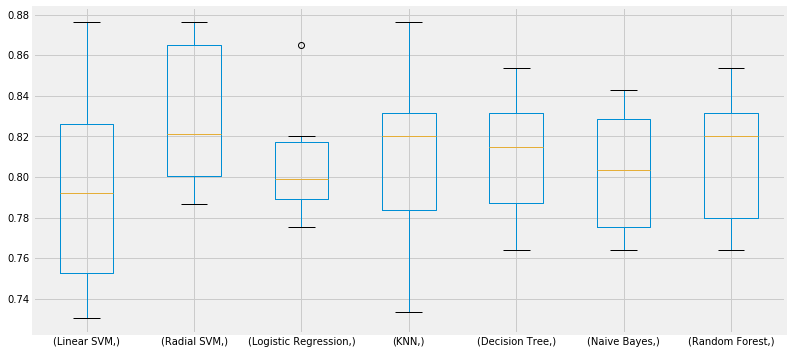

In [52]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

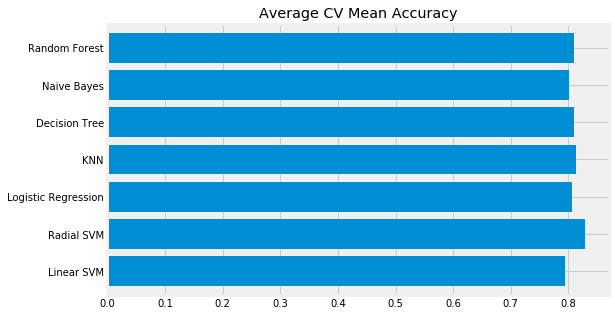

In [53]:
new_models_dataframe['CV Mean'].plot.barh(width=.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 불균형으로 인해 잘못될 수 있습니다. 모델이 어디에서 잘못되었는지 혹은 모델이 어떤 class를 예측하지 못했는지를 보여주는 confusion matrix를 통해 요약된 결과를 얻을 수 있습니다.

<br>

### Confusion Matrix
분류기에 의해 만들어진 정확한, 그리고 부정확한 분류의 수를 제공합니다.

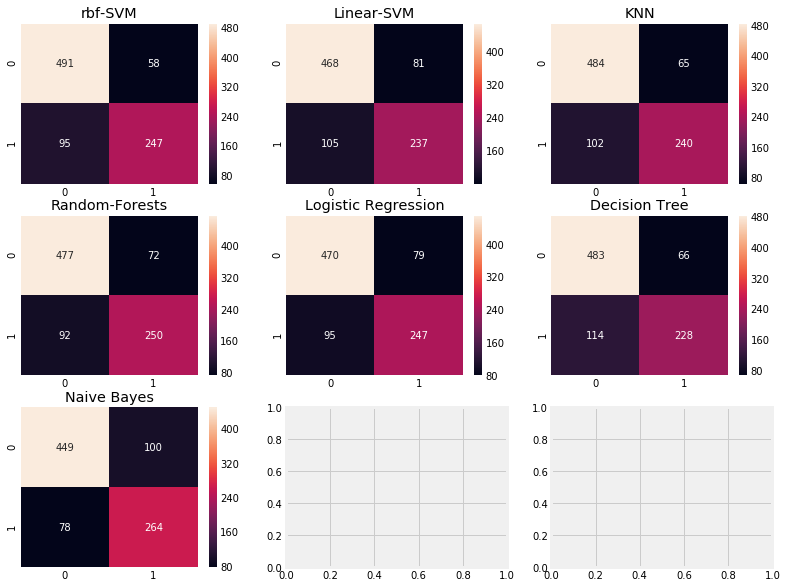

In [54]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix

왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를 나타내고 오른쪽 대각선은 잘못된 예측 수를 나타냅니다. 첫번째 plot(rbf-SVM)을 살펴봅시다.

1) 올바른 예측 수는 **491(사망) + 247(생존)**이고 평균 CV accuracy는 **(491+247)/891 = 82.8%**입니다.

2) **Errors** -> 잘못 예측된 사망자 58명(생존)과 생존자 95명(사망)입니다. 사망자를 생존자로 잘못 예측한 경우가 더 많았습니다.

모든 matrix를 보면 rbf-SVM은 죽은 승객을 정확히 예측할 가능성이 높지만 NaiveBayes는 생존한 승객을 정확하게 예측할 가능성이 높다고 말할 수 있습니다.


<br><br>

## Hyper-Parameters Tuning

머신러닝 모델은 블랙박스와 같습니다. 우리가 더 좋은 모델을 만들기 위해 바꾸거나 조정할 수 있는 몇몇 default parameter value가 있습니다. SVM model의 C와 gamma와 같은 것으로, 이를 hyper-parameter라고 부릅니다.

여기서는 가장 우수한 분류기인 SVM과 RandomForest의 hyper-parameter를 조정해볼 것입니다.

<br>

### SVM

In [55]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.1s finished


### Random Forest

In [56]:
n_estimators=range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   37.6s finished


0.819327098110602
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


rbf-SVM의 최고 점수는 **C=0.05, gamma=0.1일 때의 82.82%**이고, RandomForest는 **n_estimators=900일 때의 81.80%**입니다.

<br><br>

## Ensembling

앙상블은 accuracy나 모델의 성능을 높일 수 있는 좋은 방법입니다. 간단히 말해, 여러 개의 단순한 모델을 합쳐 하나의 강력한 모델을 만들어내는 것입니다.

휴대전화를 구입하기 위해 많은 사람들에게 다양한 parameter에 기초하여 질문한다고 생각해봅시다. 모든 다른 parameter에 대해 조사한다면 한 상품에 대한 강력한 판단력을 가질 수 있습니다. 이것이 모델의 안정성을 향상시키는 앙상블 기법입니다. 

앙상블은 다음과 같은 방법으로 행해질 수 있습니다.

1)Voting Classifier

2)Bagging

3)Boosting

<br>

### Voting Classifier
다양한 단순한 머신러닝 모델로부터의 예측을 결합하는 가장 간단한 방법입니다. 모든 하위 모델로부터 얻은 예측에 기초하여 평균 예측을 제공합니다. 하위 모델 또는 기본 모델은 모두 다른 종류입니다.

In [57]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True,kernel='rbf',C=.5,gamma=.1)),
                                                ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                                ('LR',LogisticRegression(C=.05)),
                                                ('DT',DecisionTreeClassifier(random_state=0)),
                                                ('NB',GaussianNB()),
                                                ('svm',svm.SVC(kernel='linear',probability=True))],
                                    voting='soft').fit(train_X,train_Y)

print('앙상블 모델의 accuracy:', ensemble_lin_rbf.score(test_X,test_Y))
cross = cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('교차검증 점수:',cross.mean())

앙상블 모델의 accuracy: 0.8208955223880597
교차검증 점수: 0.8249188514357053


### Bagging

배깅은 일반적인 앙상블 기법입니다. 작은 데이터셋 부분들에 유사한 분류기를 적용시키고, 그로부터 모든 예측값의 평균을 구합니다. 평균을 내기 때문에 분산이 줄어듭니다. Voting Classifier와는 다르게, 배깅은 유사한 분류기를 사용합니다.

<br>

##### Bagged KNN
배깅은 높은 분산의 모델에서 가장 잘 작동합니다. 의사결정나무나 랜덤포레스트가 그 예시입니다. 작은 값의 n_neighbours로 KNN을 사용할 수 있습니다.

In [58]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('bagged KNN의 accuracy:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('bagged KNN의 교차검증 점수:',result.mean())

bagged KNN의 accuracy: 0.835820895522388
bagged KNN의 교차검증 점수: 0.8160424469413232


##### Bagged Decision Tree

In [59]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('bagged Decision Tree의 accuracy:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('bagged Decision Tree의 교차검증 점수:',result.mean())

bagged Decision Tree의 accuracy: 0.8246268656716418
bagged Decision Tree의 교차검증 점수: 0.8227590511860174


### Boosting
부스팅은 분류기의 순차적 학습을 사용하는 앙상블 기법입니다. 약한 모델을 단계적으로 향상시키는 방법으로 부스팅은 다음과 같이 작동합니다.

모델은 우선 완전한 데이터셋을 학습합니다. 그 다음, 모델은 잘못된 부분에 대한 instance를 얻을 것입니다. 이제 다음 반복에서 모델은 잘못 예측한 instance에 더욱 집중하거나 가중치를 부여합니다. 그리고 잘못된 instance가 올바르게 예측될지 시도합니다. 이 반복과정이 계속되며 accuracy가 한계에 도달할 때까지 새로운 분류기가 모델에 추가됩니다.

<br>

##### AdaBoost (Adaptive Boosting)
이 경우 약한 학습기는 의사결정나무입니다. 그러나 default base_estimator를 선택한 알고리즘으로 변경할 수 있습니다.

In [61]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=.1)
result = cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('AdaBoost의 교차검증 점수:',result.mean())

AdaBoost의 교차검증 점수: 0.8249188514357055


##### Stochastic Gradient Boosting
역시 약한 학습기는 의사결정나무입니다.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('Gradient Boosting의 교차검증 점수:',result.mean())

Gradient Boosting의 교차검증 점수: 0.8115230961298376


##### XGBoost

In [68]:
import xgboost as xg
xgb = xg.XGBClassifier(n_estimators=900, learning_rate=.1)
result = cross_val_score(xgb,X,Y,cv=10,scoring='accuracy')
print('XGBoost의 교차검증 점수:',result.mean())

XGBoost의 교차검증 점수: 0.8115480649188515


AdaBoost에서 가장 높은 accuracy를 얻었습니다. 이제 hyper-parameter tuning을 해보겠습니다.

<br>

##### Hyper-Parameter Tuning for AdaBoost

In [64]:
n_est = list(range(100,1100,100))

lr = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_est,'learning_rate':lr}
gd = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.4min finished


가장 높은 accuracy는 **n_estimator=200이고 learning_rate=0.05일 때의 83.16%**입니다.

<br>

#### Confusion Matrix for the best Model

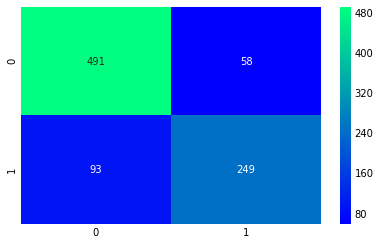

In [65]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

#### Feature Importance

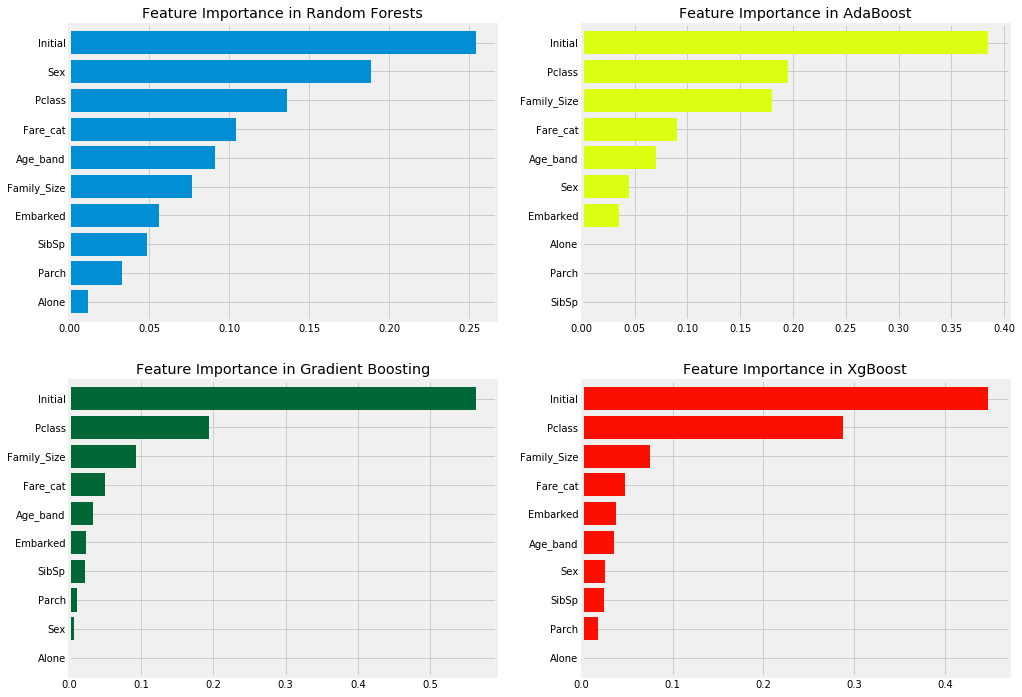

In [69]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

다양한 분류기의 중요한 feature를 확인할 수 있습니다.

<br>

**특징**<br>
1) Initial, Fare_cat, Pclass, Family_Size는 공통적으로 중요한 feature입니다.

2) Sex features는 중요하지 않아 보입니다. Pclass와 결합된 Sex가 매우 좋은 차별화 요소를 제공하는 것을 확인했다는 점에서 충격적입니다. Sex는 Random Forest에서만 중요해 보입니다.

하지만 많은 분류기에서 최상위에 Initial feature를 볼 수 있습니다. 우리는 이미 Sex와 Initial 사이의 양의 상관관계를 확인했으므로, 이는 즉 성별이 중요한 요소라는 것을 뜻합니다.

3) 비슷한 맥락으로 Pclass 및 Fare_cat은 승객의 신분을 나타내고, Family_Size는 Alone, Parch, SibSp와 관련이 있습니다.